In [33]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [34]:
consumerKey = "####"
consumerSecret = "####" 
accessToken = "####"
accessTokenSecret = "####"

In [35]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

authenticate.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [36]:
posts = api.user_timeline(screen_name = 'JoeBiden', count = 100, lang = 'en', tweet_mode = 'extended')

print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i = i + 1

Show the 5 recent tweets: 

1) Let's get to work, @KamalaHarris. https://t.co/uYe2EsmaFa

2) I won't be president until January 20th, but my message today to everyone is this: wear a mask.

3) The bottom line: I will spare no effort to turn this pandemic around.

4) The challenge before us right now is still immense and growing, and so is the need for bold action to fight this pandemic.

5) My COVID-19 Transition Advisory Board will advise on detailed plans built on a bedrock of science, and that keep compassion, empathy, and care for every American at its core.



In [37]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns =['Tweets'])

df.head()

,Tweets
0,"Let's get to work, @KamalaHarris. https://t.co..."
1,"I won't be president until January 20th, but m..."
2,The bottom line: I will spare no effort to tur...
3,The challenge before us right now is still imm...
4,My COVID-19 Transition Advisory Board will adv...


In [38]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', "", text) #Removes @mentions
    text = re.sub(r"#", '', text)
    text = re.sub(r"RT[\s]+", '', text)
    text = re.sub(r"https?:\/\/\S+", "", text)
    
    return text

#applying function
df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,"Let's get to work, ."
1,"I won't be president until January 20th, but m..."
2,The bottom line: I will spare no effort to tur...
3,The challenge before us right now is still imm...
4,My COVID-19 Transition Advisory Board will adv...
...,...
95,We can overcome these crises.\n\nWe can take o...
96,"Today, vote for a new day in America."
97,"In 2008 and 2012, you placed your trust in me ..."
98,It all comes down to this.\n\nGo vote:


In [39]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df["Tweets"].apply(getSubjectivity)
df['Polarity'] = df["Tweets"].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,"Let's get to work, .",0.000000,0.000000
1,"I won't be president until January 20th, but m...",0.000000,0.000000
2,The bottom line: I will spare no effort to tur...,0.000000,0.000000
3,The challenge before us right now is still imm...,0.575595,0.179762
4,My COVID-19 Transition Advisory Board will adv...,0.375000,0.200000
...,...,...,...
95,We can overcome these crises.\n\nWe can take o...,0.200000,0.400000
96,"Today, vote for a new day in America.",0.454545,0.136364
97,"In 2008 and 2012, you placed your trust in me ...",0.288889,-0.155556
98,It all comes down to this.\n\nGo vote:,0.288889,-0.155556


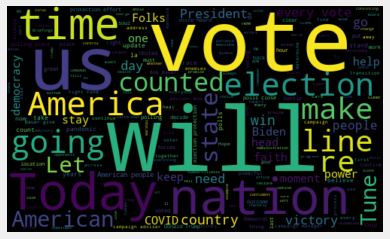

In [40]:
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [41]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,"Let's get to work, .",0.000000,0.000000,Neutral
1,"I won't be president until January 20th, but m...",0.000000,0.000000,Neutral
2,The bottom line: I will spare no effort to tur...,0.000000,0.000000,Neutral
3,The challenge before us right now is still imm...,0.575595,0.179762,Positive
4,My COVID-19 Transition Advisory Board will adv...,0.375000,0.200000,Positive
...,...,...,...,...
95,We can overcome these crises.\n\nWe can take o...,0.200000,0.400000,Positive
96,"Today, vote for a new day in America.",0.454545,0.136364,Positive
97,"In 2008 and 2012, you placed your trust in me ...",0.288889,-0.155556,Negative
98,It all comes down to this.\n\nGo vote:,0.288889,-0.155556,Negative


In [42]:
j=1 # Print Positive Tweets
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' +sortedDF['Tweets'][i])
        print()
        j = j+1

1) The challenge before us right now is still immense and growing, and so is the need for bold action to fight this pandemic.

2) My COVID-19 Transition Advisory Board will advise on detailed plans built on a bedrock of science, and that keep compassion, empathy, and care for every American at its core.

3) With full hearts and steady hands, with faith in America and in each other, with a love of country — and a thirst for justice — let us be the nation that we know we can be.

4) Tonight, the whole world is watching America. I believe at our best America is a beacon for the globe.

And we lead not by the example of our power, but by the power of our example.

5) Now that the campaign is over—what is the people’s will? What is our mandate?

I believe it is this: Americans have called on us to marshal the forces of decency and the forces of fairness. To marshal the forces of science and the forces of hope in the great battles of our time.

6) We cannot repair the economy, restore our vi

In [43]:
j=1
sortedDF =df.sort_values(by=['Polarity'], ascending ='False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' +sortedDF['Tweets'][i])
        print()
        j = j+1

1) I spent the morning with the co-chairs of my COVID-19 Council discussing the status of this pandemic and how we move forward. Tune in as I provide an update on how we're going to beat this virus. 

2) It’s time to put away the harsh rhetoric.

To lower the temperature.

To see each other again.

To listen to each other again.

3) I spent the afternoon attending briefings on the ongoing COVID-19 crisis and the state of the economy. Tune in as I provide an update on these briefings and efforts to count every vote. 

4) Once this election is finalized and behind us, it will be time for us to do what we've always done as Americans: To put the harsh rhetoric of the campaign behind us.

5) Every moment of the last four years comes down to today.

Don’t miss your chance to make your voice heard.

Head to  to confirm your polling place and go vote before polls close.

6) : The 2016 election was lost by small margins in a few key battleground states. We need your help to remind voters what’s

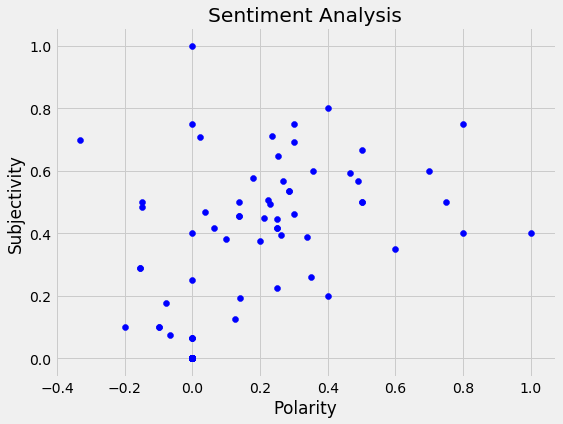

In [44]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df['Subjectivity'][i], color="Blue")
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [45]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets["Tweets"]

round( (ptweets.shape[0] / df.shape[0]) * 100, 1 )

43.0

In [46]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets["Tweets"]

round( (ntweets.shape[0] / df.shape[0]) * 100, 1 )

10.0

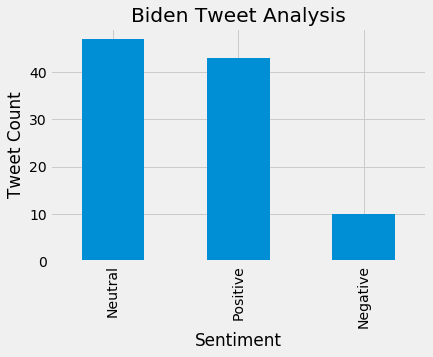

In [47]:
df['Analysis'].value_counts()

plt.title('Biden Tweet Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()